In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('/kaggle/input/life-expectancy-who-updated/Life-Expectancy-Data-Updated.csv')

In [3]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [4]:
#check for missing data

df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [5]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


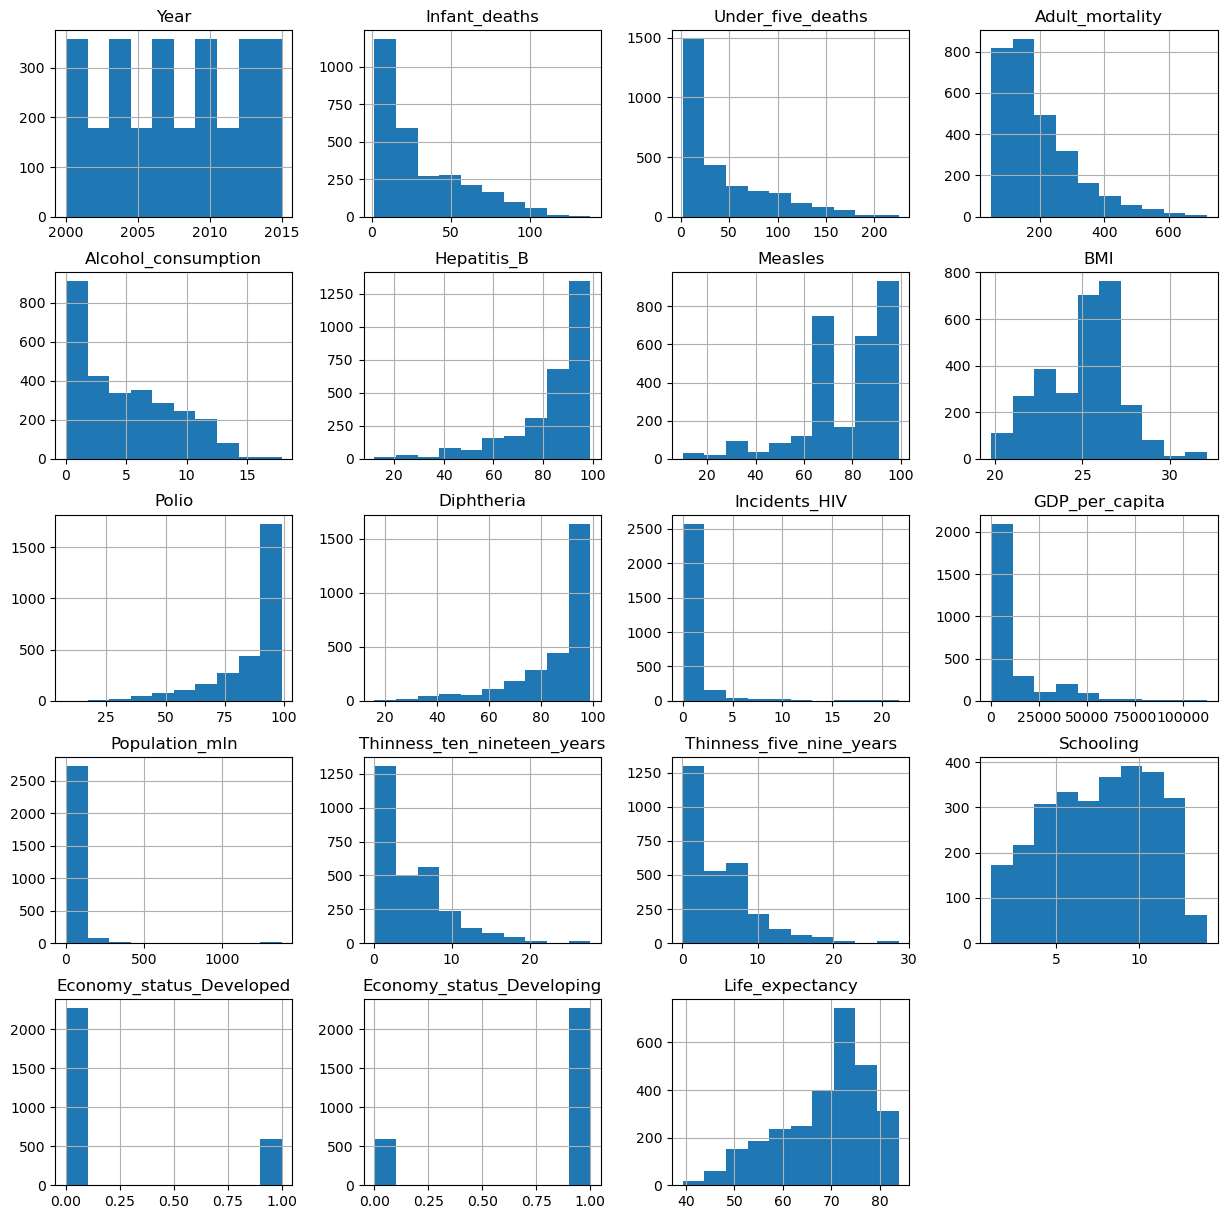

In [6]:
df.hist(figsize=(15, 15))
plt.show()

In [7]:
corr_matrix = df.corr()

corr_matrix['Life_expectancy'].sort_values(ascending=False)


Life_expectancy                1.000000
Schooling                      0.732484
Polio                          0.641217
Diphtheria                     0.627541
BMI                            0.598423
GDP_per_capita                 0.583090
Economy_status_Developed       0.523791
Measles                        0.490019
Hepatitis_B                    0.417804
Alcohol_consumption            0.399159
Year                           0.174359
Population_mln                 0.026298
Thinness_five_nine_years      -0.458166
Thinness_ten_nineteen_years   -0.467824
Economy_status_Developing     -0.523791
Incidents_HIV                 -0.553027
Infant_deaths                 -0.920032
Under_five_deaths             -0.920419
Adult_mortality               -0.945360
Name: Life_expectancy, dtype: float64

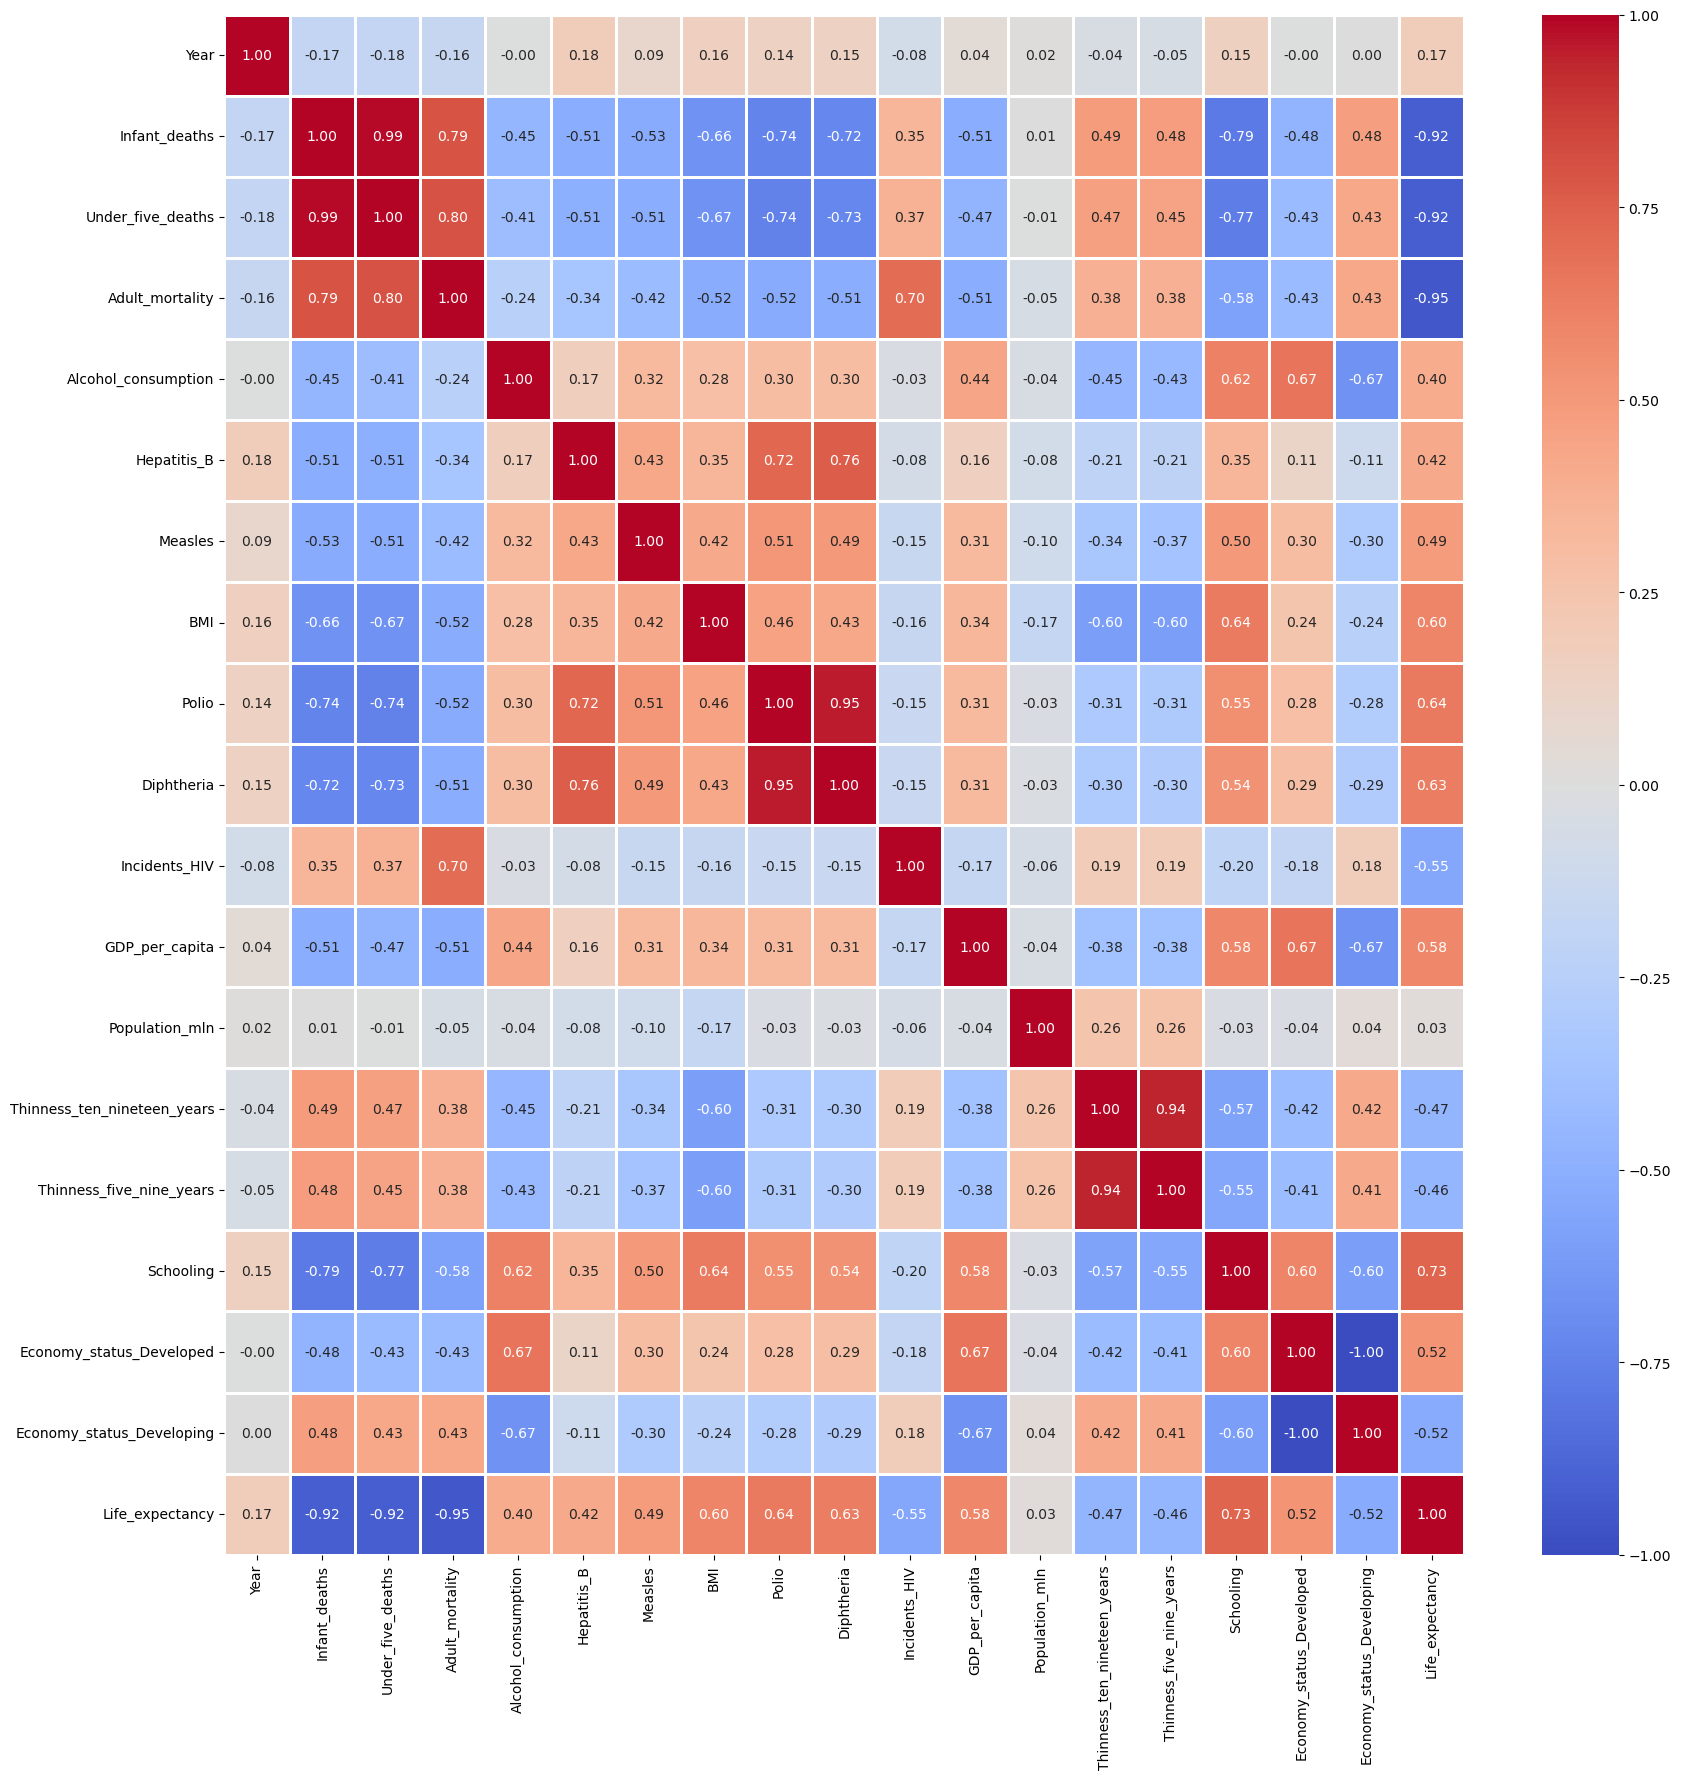

In [8]:
# Heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.show()

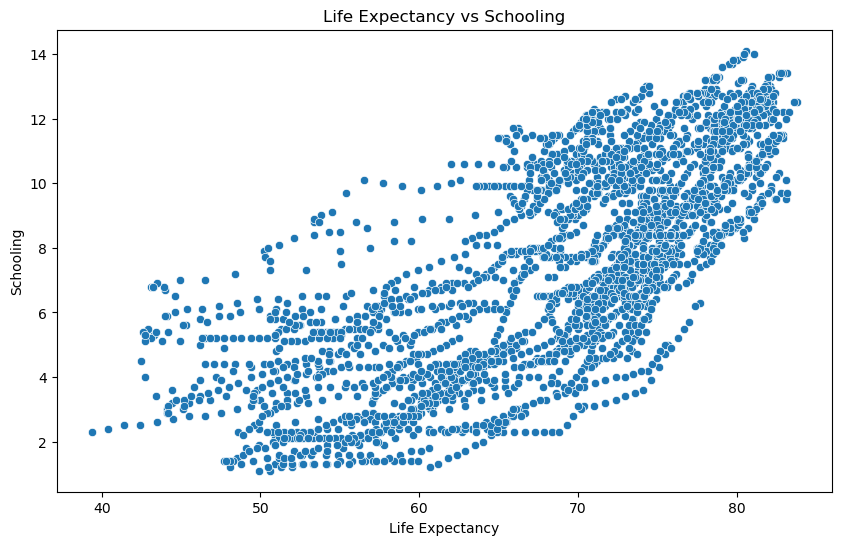

In [9]:
#Life Expectancy vs. Schooling.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Life_expectancy', y='Schooling')
plt.xlabel('Life Expectancy')
plt.ylabel('Schooling')
plt.title('Life Expectancy vs Schooling')
plt.show()

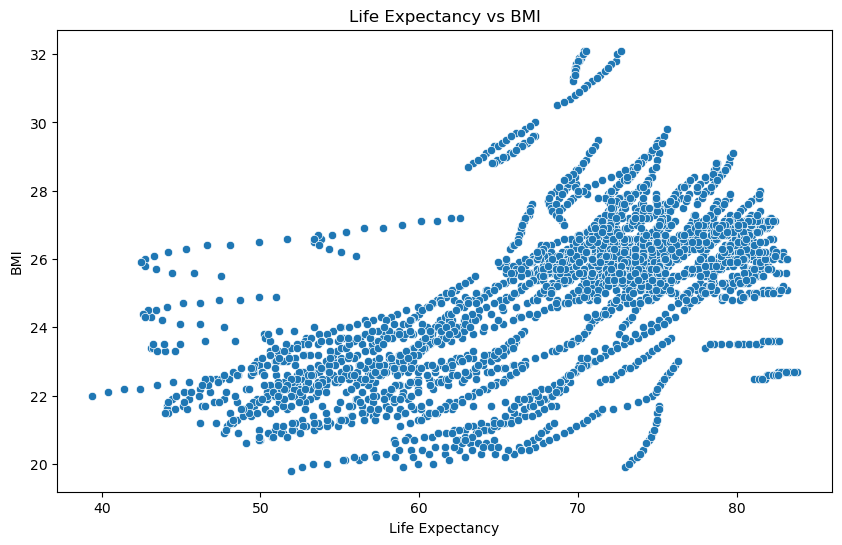

In [10]:
#Life Expectancy vs. BMI

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Life_expectancy', y='BMI')
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
plt.title('Life Expectancy vs BMI')
plt.show()

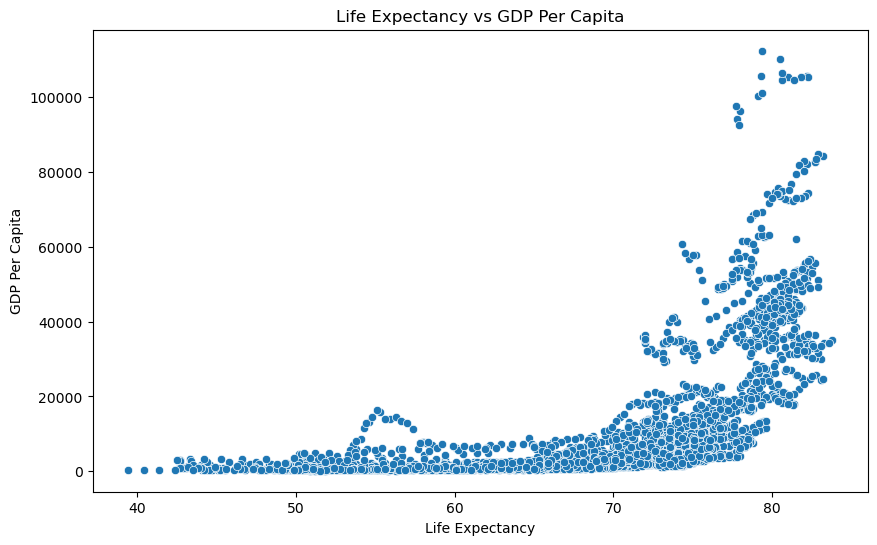

In [11]:
#Life Expectancy vs. BMI

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Life_expectancy', y='GDP_per_capita')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP Per Capita')
plt.title('Life Expectancy vs GDP Per Capita')
plt.show()

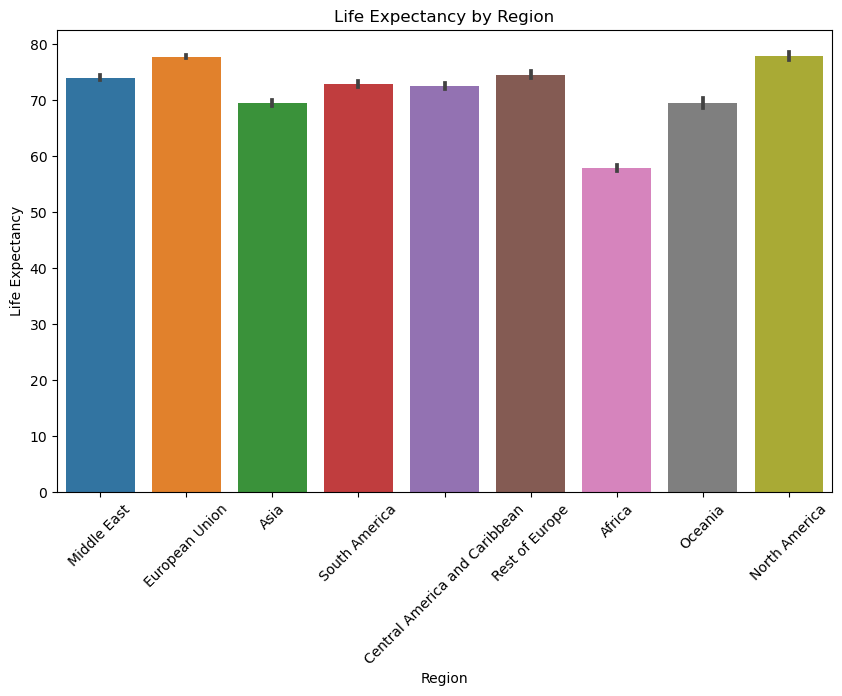

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Life_expectancy')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Region')
plt.xticks(rotation=45)
plt.show()

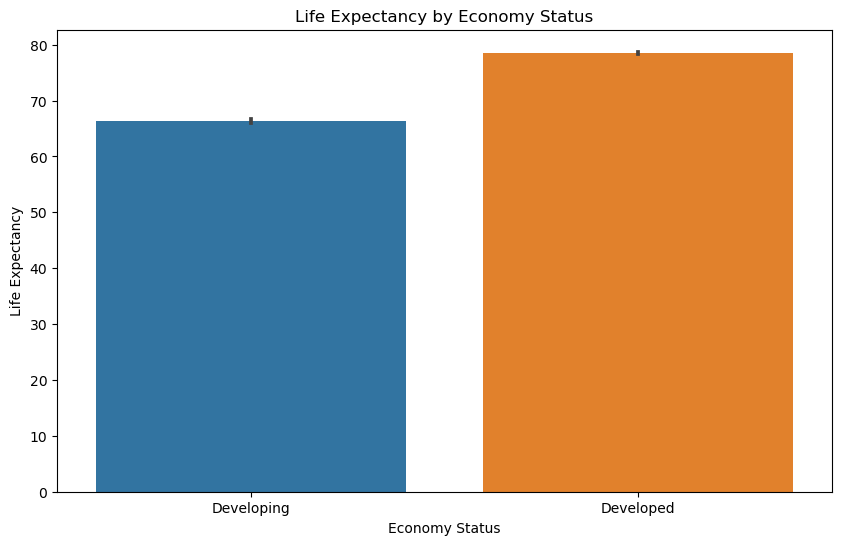

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='Economy_status_Developed', y='Life_expectancy', ax=ax)
ax.set_xlabel('Economy Status')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy by Economy Status')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Developing', 'Developed'])
plt.show()

In [14]:
df_normalized = pd.get_dummies(df, columns=['Region'], drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler

cols_to_normalize = ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling']

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize the selected columns
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df_normalized.head()

,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Economy_status_Developing,Life_expectancy,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,Turkiye,1.626978,-0.699654,-0.671831,-0.752264,-0.879342,0.794574,-0.661700,1.261475,97,...,1,76.5,0,0,0,1,0,0,0,0
1,Spain,1.626978,-1.004739,-0.889504,-1.169371,1.388788,0.794574,0.892723,0.440877,97,...,0,82.8,0,0,1,0,0,0,0,0
2,India,-0.108465,0.767660,0.560155,0.076810,-0.816547,-1.518979,-2.269725,-1.747384,67,...,1,65.4,1,0,0,0,0,0,0,0
3,Guyana,-0.325396,0.088482,-0.054716,0.260638,0.215791,0.544460,-0.179293,0.121756,92,...,1,67.0,0,0,0,0,0,0,0,1
4,Israel,0.976187,-0.979315,-0.867064,-1.168949,-0.484993,0.794574,0.624719,0.896765,94,...,0,81.7,0,0,0,1,0,0,0,0


In [16]:
# Feature Selection - select the most relevant features based on correlation results
selected_features = ['Schooling', 'Polio', 'Diphtheria', 'BMI', 'GDP_per_capita', 'Economy_status_Developed', 'Measles', 'Hepatitis_B', 'Alcohol_consumption', 'Year', 'Population_mln', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years', 'Economy_status_Developing', 'Incidents_HIV', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality']

X = df_normalized[selected_features]
y = df_normalized['Life_expectancy']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# Model Selection and Training - Example: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)




LinearRegression()

In [18]:
# Model Evaluation
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_lr = r2_score(y_test, y_pred)

print('Linear Regression')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2_lr)

Linear Regression
Mean Absolute Error (MAE): 1.0911851286586478
Mean Squared Error (MSE): 1.8332810646140132
Root Mean Squared Error (RMSE): 1.3539870991313074
R-squared (R2) score: 0.9779099352682716


In [19]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression")
print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R2) score:", r2_dt)

Decision Tree Regression
Mean Absolute Error (MAE): 0.4827225130890051
Mean Squared Error (MSE): 0.48924956369982536
Root Mean Squared Error (RMSE): 0.6994637686827141
R-squared (R2) score: 0.9941048021818878


In [21]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2) score:", r2_rf)

Random Forest Regression
Mean Absolute Error (MAE): 0.3578760907504389
Mean Squared Error (MSE): 0.2389654851657965
Root Mean Squared Error (RMSE): 0.4888409610147215
R-squared (R2) score: 0.9971205926151467


In [23]:
# Support Vector Regression
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)


SVR(kernel='linear')

In [24]:
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression")
print("Mean Absolute Error (MAE):", mae_svr)
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2) score:", r2_svr)

Support Vector Regression
Mean Absolute Error (MAE): 1.069937260554004
Mean Squared Error (MSE): 1.8794241642038272
Root Mean Squared Error (RMSE): 1.370920918289537
R-squared (R2) score: 0.9773539353855825


**The results indicate that the Random Forest Regression model has the best performance among the models tested. It has the lowest MAE, MSE, and RMSE values and the highest R-squared score. This suggests that the Random Forest model is best suited for predicting life expectancy using the given dataset.**

In [25]:
#Visualization
def scatter_plot(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('Actual Life Expectancy')
    plt.ylabel('Predicted Life Expectancy')
    plt.title(f'{model_name} Predictions vs Actual Values')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')
    plt.show()

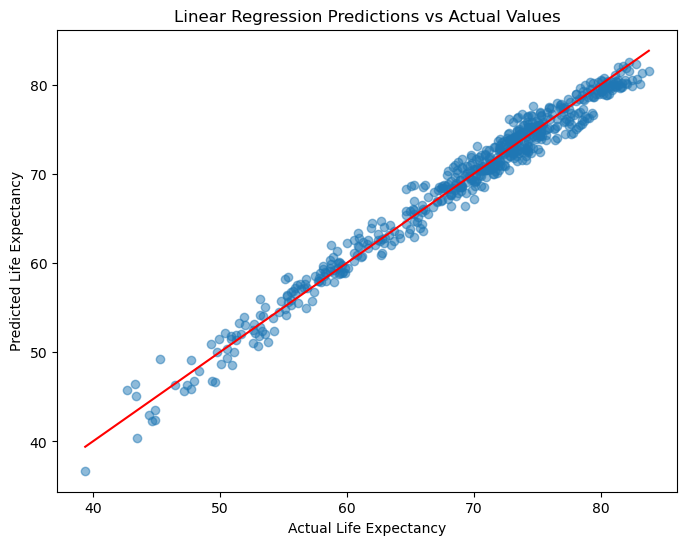

In [26]:
scatter_plot(y_test, y_pred, 'Linear Regression')

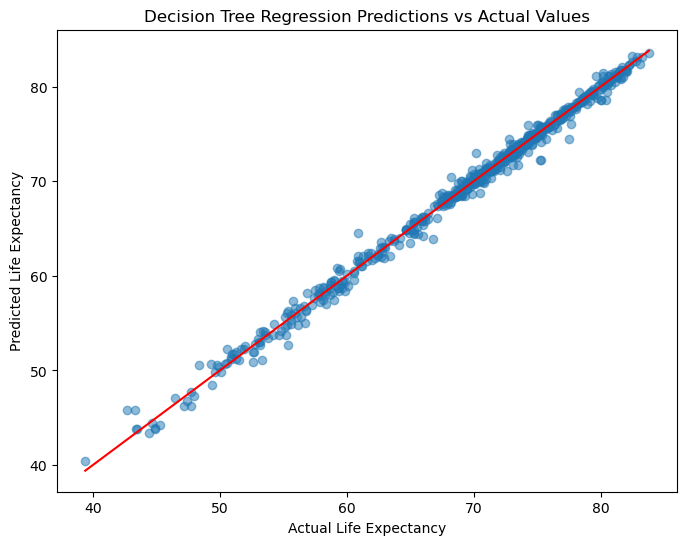

In [27]:
scatter_plot(y_test, y_pred_dt, 'Decision Tree Regression')


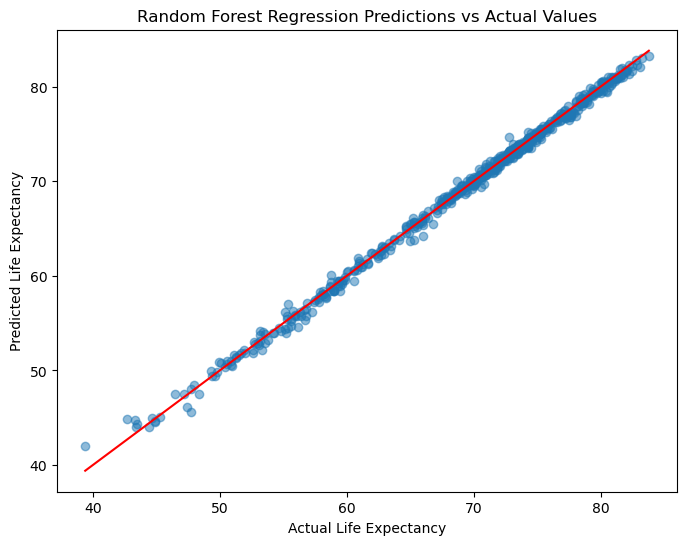

In [28]:
scatter_plot(y_test, y_pred_rf, 'Random Forest Regression')


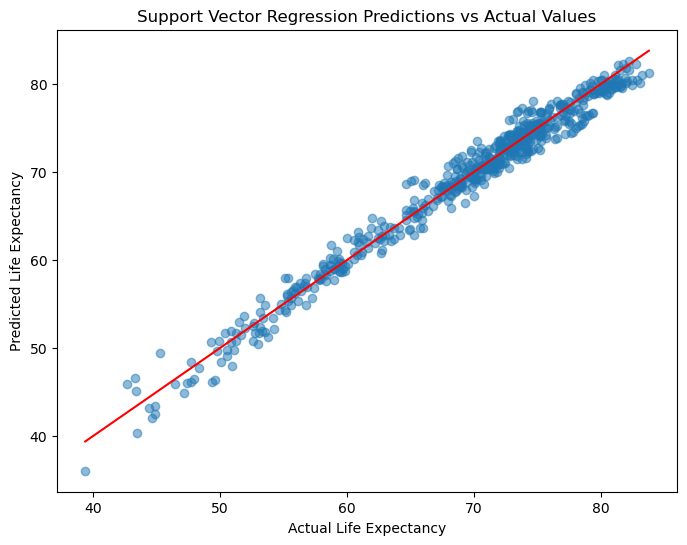

In [29]:
scatter_plot(y_test, y_pred_svr, 'Support Vector Regression')


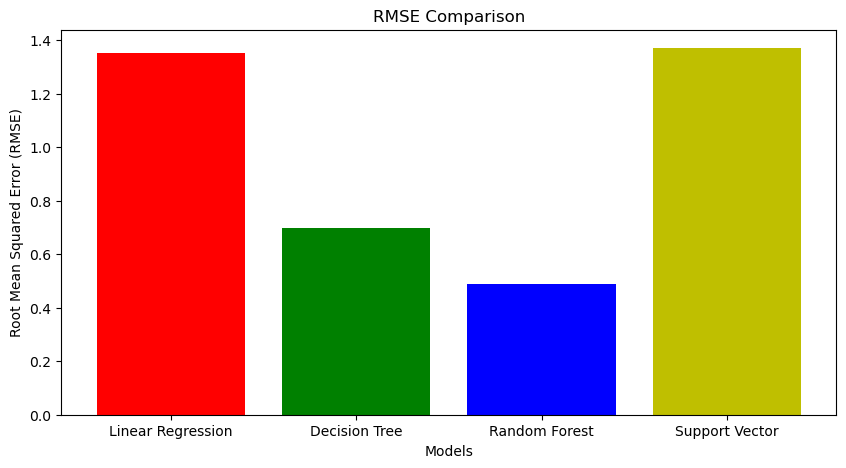

In [30]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector']
rmse_values = [1.3539870991313074, 0.6994637686827141, 0.4888409610147215, 1.370920918289537]
colors = ['r', 'g', 'b', 'y']

# Create a bar chart for RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color=colors)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison')
plt.show()

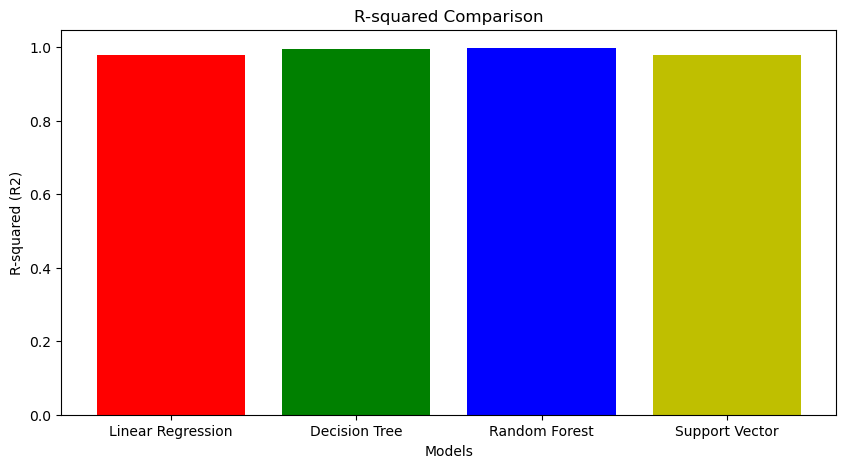

In [31]:
r2_values = [0.9779099352682716, 0.9941048021818878, 0.9971205926151467, 0.9773539353855825]
# Create a bar chart for R-squared
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color=colors)
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('R-squared Comparison')
plt.show()

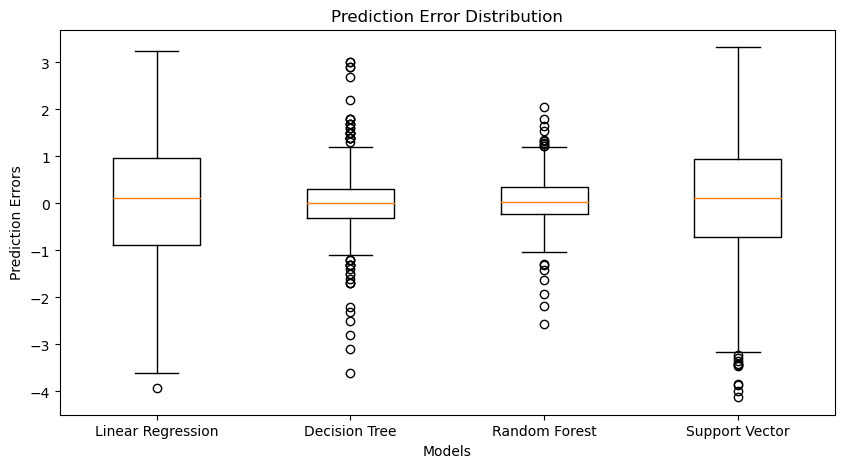

In [32]:
# Calculate prediction errors for each model
errors_lr = y_test - y_pred
errors_dt = y_test - y_pred_dt
errors_rf = y_test - y_pred_rf
errors_svr = y_test - y_pred_svr

# Create a box plot for prediction errors
plt.figure(figsize=(10, 5))
plt.boxplot([errors_lr, errors_dt, errors_rf, errors_svr], labels=models)
plt.xlabel('Models')
plt.ylabel('Prediction Errors')
plt.title('Prediction Error Distribution')
plt.show()

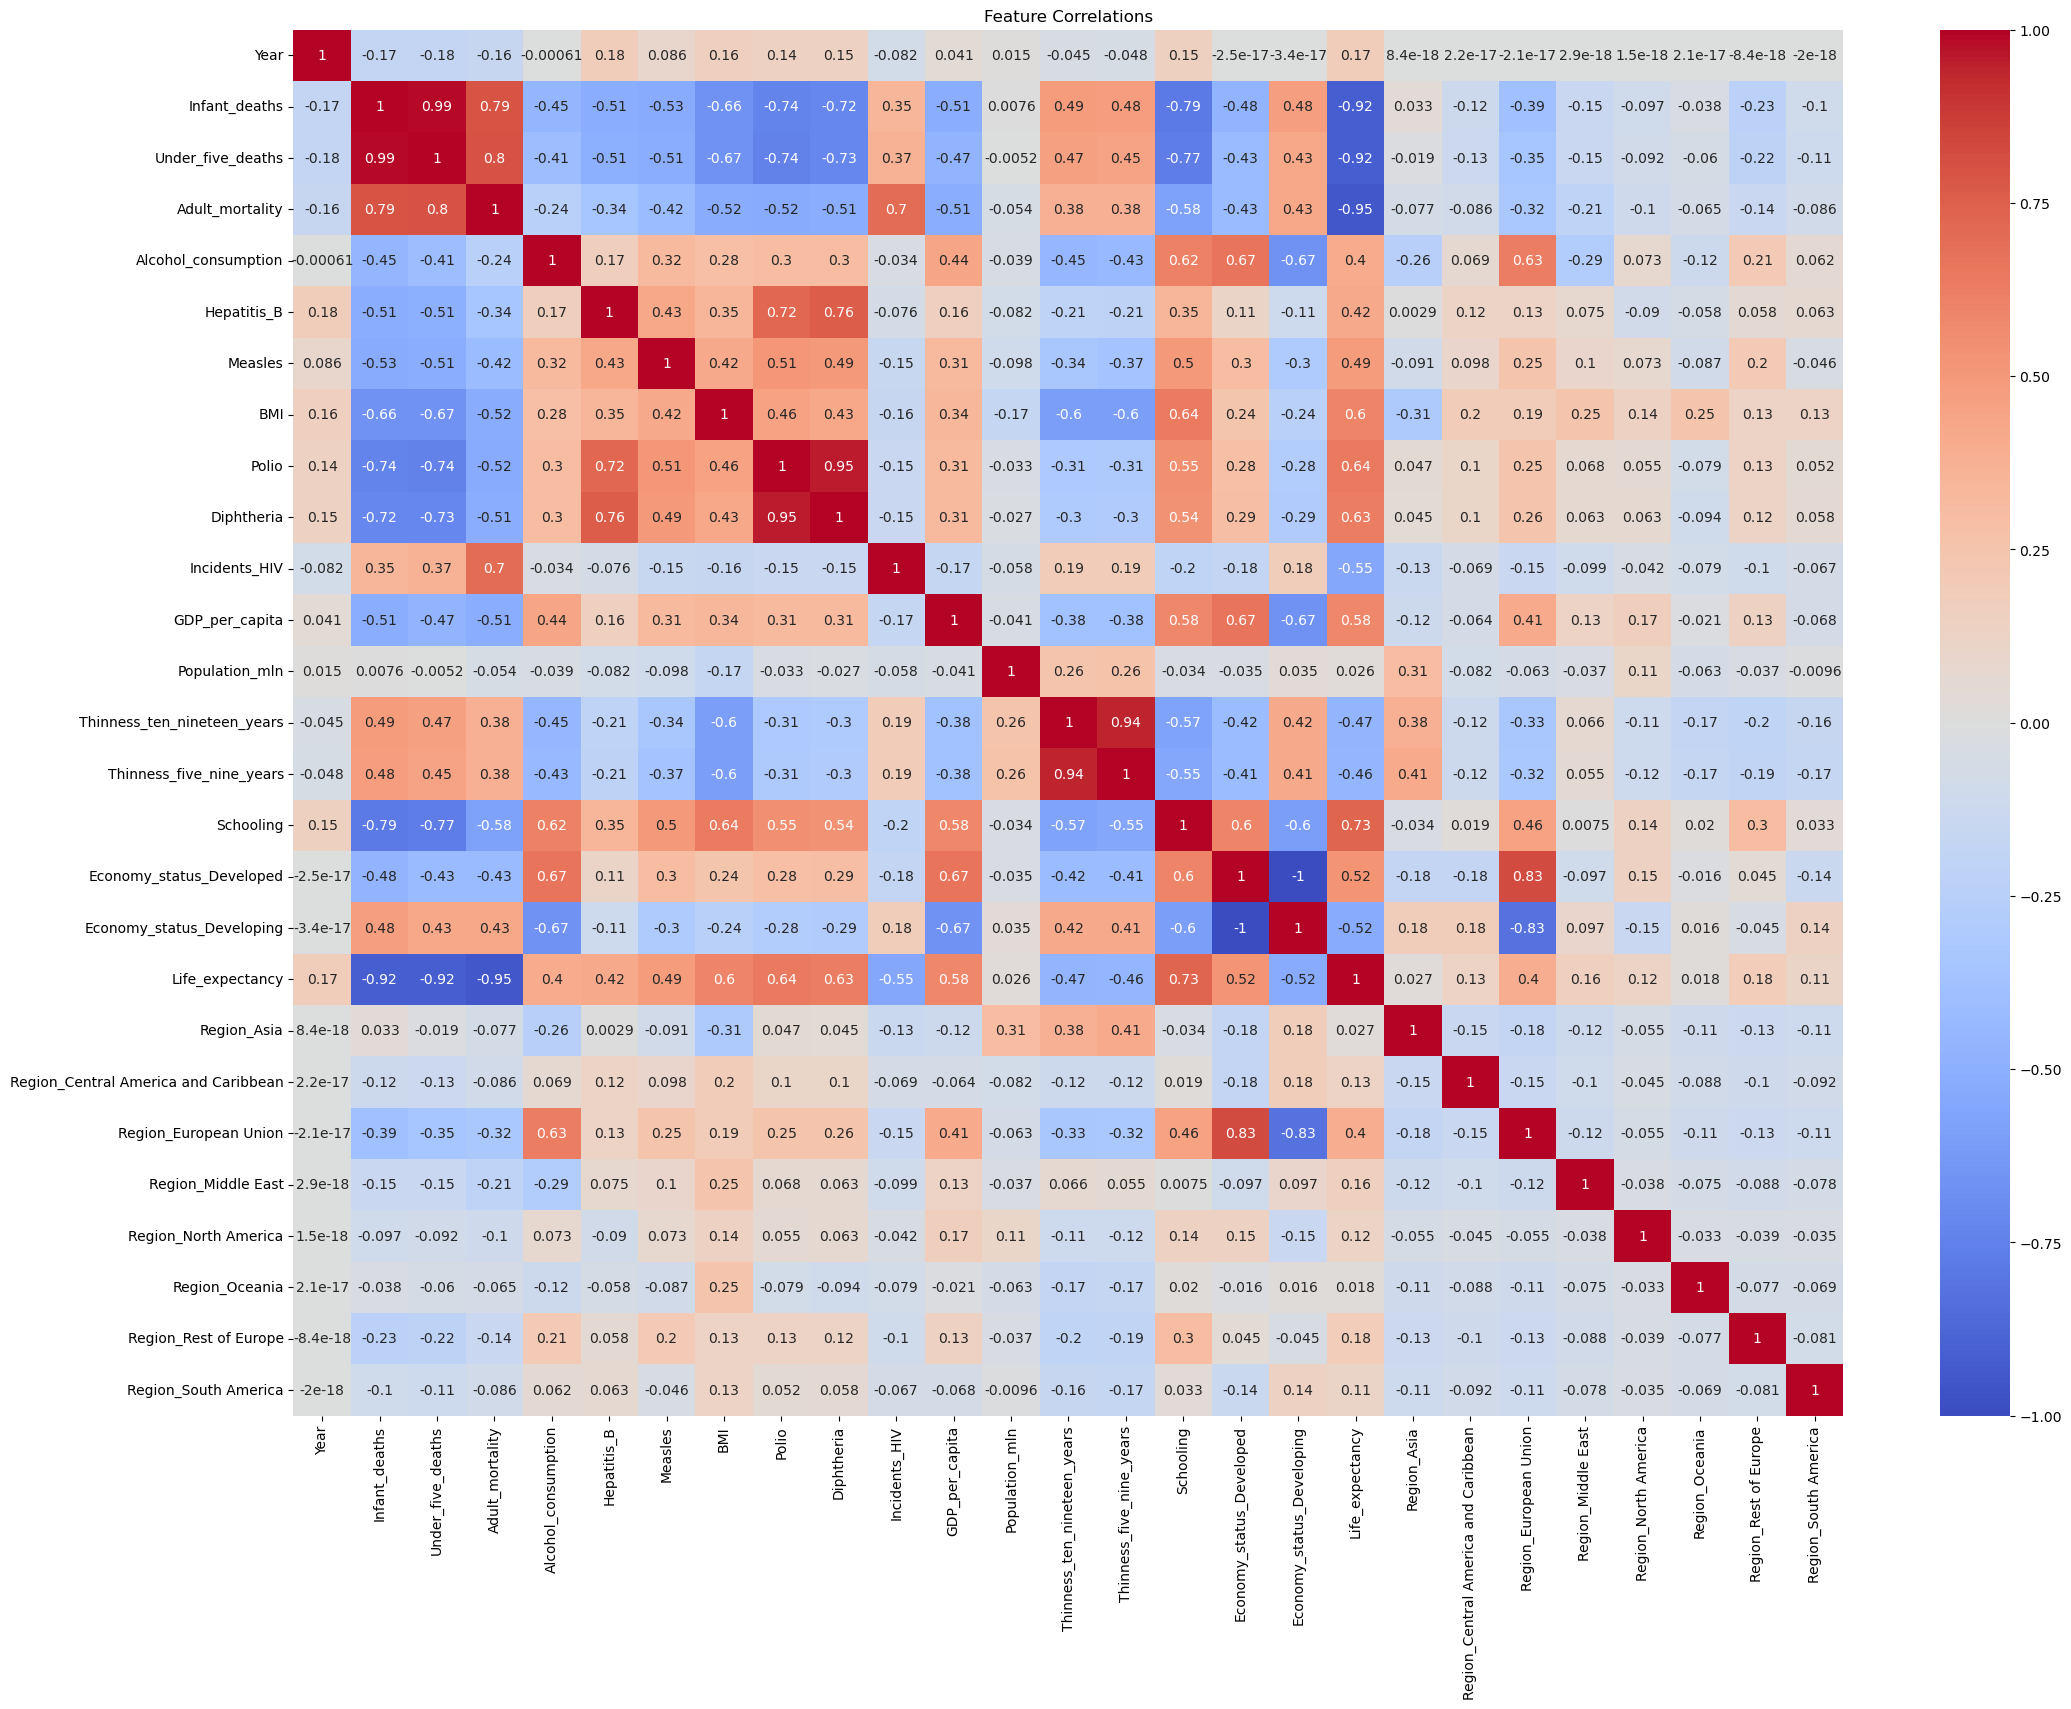

In [33]:
plt.figure(figsize=(25, 18))
correlations = df_normalized.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [34]:
yearly_means = df.groupby('Year')[['Infant_deaths', 'Under_five_deaths', 'Adult_mortality']].mean().reset_index()


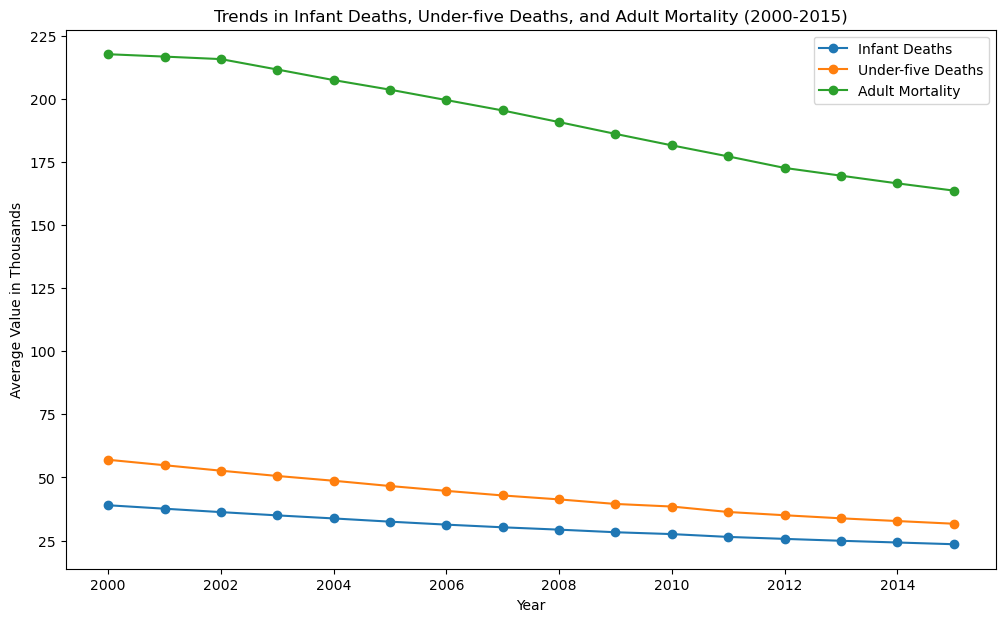

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(yearly_means['Year'], yearly_means['Infant_deaths'], label='Infant Deaths', marker='o')
plt.plot(yearly_means['Year'], yearly_means['Under_five_deaths'], label='Under-five Deaths', marker='o')
plt.plot(yearly_means['Year'], yearly_means['Adult_mortality'], label='Adult Mortality', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Value in Thousands')
plt.title('Trends in Infant Deaths, Under-five Deaths, and Adult Mortality (2000-2015)')
plt.legend()
plt.show()

# **GDP Prediction**

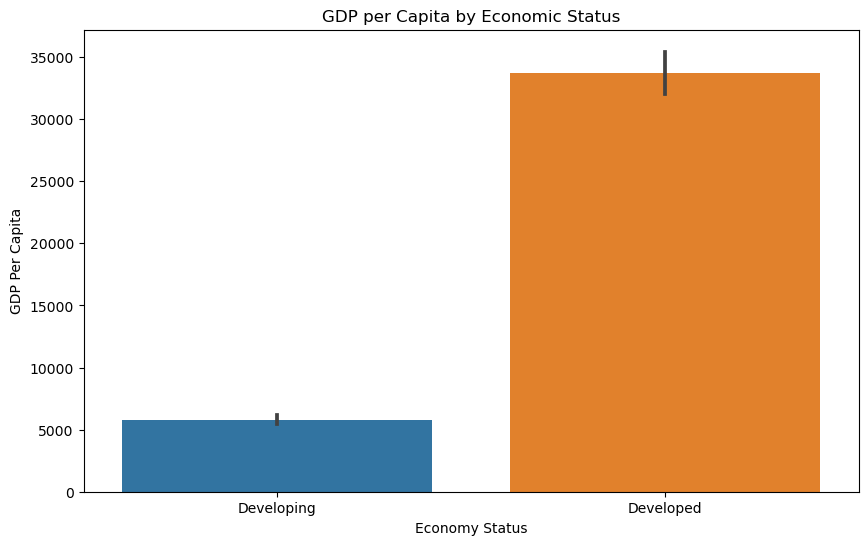

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='Economy_status_Developed', y='GDP_per_capita', ax=ax)
ax.set_xlabel('Economy Status')
ax.set_ylabel('GDP Per Capita')
ax.set_title('GDP per Capita by Economic Status')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Developing', 'Developed'])
plt.show()

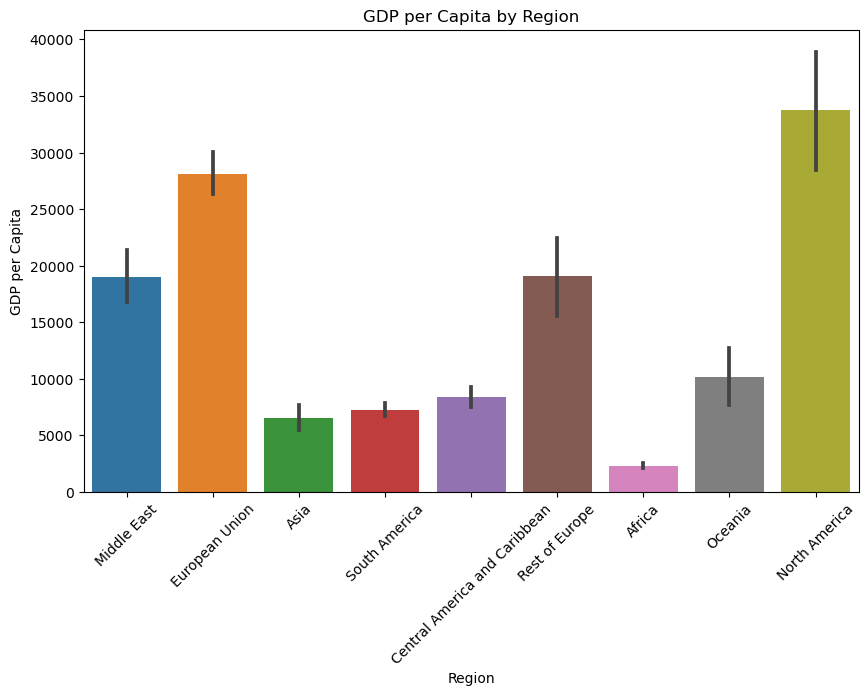

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='GDP_per_capita')
plt.xlabel('Region')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita by Region')
plt.xticks(rotation=45)
plt.show()

In [38]:
corr_matrix = df.corr()

corr_matrix['GDP_per_capita'].sort_values(ascending=False)


GDP_per_capita                 1.000000
Economy_status_Developed       0.667547
Life_expectancy                0.583090
Schooling                      0.580626
Alcohol_consumption            0.443966
BMI                            0.336180
Polio                          0.313786
Measles                        0.313724
Diphtheria                     0.313321
Hepatitis_B                    0.159375
Year                           0.040998
Population_mln                -0.040839
Incidents_HIV                 -0.169590
Thinness_ten_nineteen_years   -0.375270
Thinness_five_nine_years      -0.381032
Under_five_deaths             -0.469682
Adult_mortality               -0.510121
Infant_deaths                 -0.512286
Economy_status_Developing     -0.667547
Name: GDP_per_capita, dtype: float64

In [39]:
selected_for_GDP = ['Alcohol_consumption', 'Schooling', 'Adult_mortality', 'Life_expectancy', 'Economy_status_Developed']

target_var = 'GDP_per_capita'

X1 = df[selected_for_GDP]
y1 = df[target_var]

X1

,Alcohol_consumption,Schooling,Adult_mortality,Life_expectancy,Economy_status_Developed
0,1.320,7.8,105.8240,76.5,0
1,10.350,9.7,57.9025,82.8,1
2,1.570,5.0,201.0765,65.4,0
3,5.680,7.9,222.1965,67.0,0
4,2.890,12.8,57.9510,81.7,1
...,...,...,...,...,...
2859,0.092,1.1,291.8240,49.9,0
2860,6.560,9.1,235.2330,66.9,0
2861,1.560,10.3,134.8950,74.3,0
2862,11.000,11.1,204.0120,71.8,1


In [40]:
normalized_X = (X1 - X1.mean()) / X1.std()
normalized_X['Economy_status_Developed'] = X1['Economy_status_Developed']

scaled_X = pd.DataFrame(scaler.fit_transform(X1), columns=selected_for_GDP)

#scaled_X['Economy_status_Developed'] = X1['Economy_status_Developed']


In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(normalized_X, y1, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_X, y1, test_size=0.2, random_state=42)



# **Linear Regression Normalized**

In [42]:
lr1_model = LinearRegression()
lr1_model.fit(X1_train, y1_train)

LinearRegression()

In [43]:
y1_pred = lr1_model.predict(X1_test)
mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
r2_lr1 = r2_score(y1_test, y1_pred)

print('Linear Regression')
print("Mean Absolute Error (MAE):", mae1)
print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("R-squared (R2) score:", r2_lr1)

Linear Regression
Mean Absolute Error (MAE): 7555.700077346061
Mean Squared Error (MSE): 139715937.1849579
Root Mean Squared Error (RMSE): 11820.14962616624
R-squared (R2) score: 0.42560518183682994


**Standardized**

In [44]:
lr2_model = LinearRegression()
lr2_model.fit(X2_train, y2_train)

LinearRegression()

In [45]:
y2_pred = lr2_model.predict(X2_test)
mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r2_lr2 = r2_score(y2_test, y2_pred)

print('Linear Regression')
print("Mean Absolute Error (MAE):", mae2)
print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared (R2) score:", r2_lr2)

Linear Regression
Mean Absolute Error (MAE): 7555.700077346066
Mean Squared Error (MSE): 139715937.18495795
Root Mean Squared Error (RMSE): 11820.149626166241
R-squared (R2) score: 0.4256051818368296


# **Decision Tree Normalized**

In [46]:
# Decision Tree Regression
dt1_model = DecisionTreeRegressor(random_state=42)
dt1_model.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=42)

In [47]:
y_pred_dt1 = dt1_model.predict(X1_test)
mae_dt1 = mean_absolute_error(y1_test, y_pred_dt1)
mse_dt1 = mean_squared_error(y1_test, y_pred_dt1)
rmse_dt1 = np.sqrt(mse_dt1)
r2_dt1 = r2_score(y1_test, y_pred_dt1)

print("Decision Tree Regression")
print("Mean Absolute Error (MAE):", mae_dt1)
print("Mean Squared Error (MSE):", mse_dt1)
print("Root Mean Squared Error (RMSE):", rmse_dt1)
print("R-squared (R2) score:", r2_dt1)

Decision Tree Regression
Mean Absolute Error (MAE): 1855.0453752181502
Mean Squared Error (MSE): 37353735.28621291
Root Mean Squared Error (RMSE): 6111.770225246767
R-squared (R2) score: 0.846432751912647


**Standardized**

In [48]:
dt2_model = DecisionTreeRegressor(random_state=42)
dt2_model.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=42)

In [49]:
y_pred_dt2 = dt2_model.predict(X2_test)
mae_dt2 = mean_absolute_error(y2_test, y_pred_dt2)
mse_dt2 = mean_squared_error(y2_test, y_pred_dt2)
rmse_dt2 = np.sqrt(mse_dt2)
r2_dt2 = r2_score(y2_test, y_pred_dt2)

print("Decision Tree Regression")
print("Mean Absolute Error (MAE):", mae_dt2)
print("Mean Squared Error (MSE):", mse_dt2)
print("Root Mean Squared Error (RMSE):", rmse_dt2)
print("R-squared (R2) score:", r2_dt2)

Decision Tree Regression
Mean Absolute Error (MAE): 1885.975567190227
Mean Squared Error (MSE): 37715424.34904014
Root Mean Squared Error (RMSE): 6141.288492575491
R-squared (R2) score: 0.8449457896686817


# **Random Forest Normalized**

In [50]:
# Random Forest Regression
rf1_model = RandomForestRegressor(random_state=42)
rf1_model.fit(X1_train, y1_train)

RandomForestRegressor(random_state=42)

In [51]:
y_pred_rf1 = rf1_model.predict(X1_test)
mae_rf1 = mean_absolute_error(y1_test, y_pred_rf1)
mse_rf1 = mean_squared_error(y1_test, y_pred_rf1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y1_test, y_pred_rf1)

print("Random Forest Regression")
print("Mean Absolute Error (MAE):", mae_rf1)
print("Mean Squared Error (MSE):", mse_rf1)
print("Root Mean Squared Error (RMSE):", rmse_rf1)
print("R-squared (R2) score:", r2_rf1)

Random Forest Regression
Mean Absolute Error (MAE): 2392.42242582897
Mean Squared Error (MSE): 36729560.611297555
Root Mean Squared Error (RMSE): 6060.491779657617
R-squared (R2) score: 0.8489988349674773


Standardized

In [52]:
# Random Forest Regression
rf2_model = RandomForestRegressor(random_state=42)
rf2_model.fit(X2_train, y2_train)

RandomForestRegressor(random_state=42)

In [53]:
y_pred_rf2 = rf2_model.predict(X2_test)
mae_rf2 = mean_absolute_error(y2_test, y_pred_rf2)
mse_rf2 = mean_squared_error(y2_test, y_pred_rf2)
rmse_rf2 = np.sqrt(mse_rf2)
r2_rf2 = r2_score(y2_test, y_pred_rf2)

print("Random Forest Regression")
print("Mean Absolute Error (MAE):", mae_rf2)
print("Mean Squared Error (MSE):", mse_rf2)
print("Root Mean Squared Error (RMSE):", rmse_rf2)
print("R-squared (R2) score:", r2_rf2)

Random Forest Regression
Mean Absolute Error (MAE): 2402.3021291448517
Mean Squared Error (MSE): 36987305.697596855
Root Mean Squared Error (RMSE): 6081.718975552624
R-squared (R2) score: 0.8479392032249558


# **Support Vector Model Normalized**

In [54]:
# Support Vector Regression
svr1_model = SVR(kernel='linear')
svr1_model.fit(X1_train, y1_train)

SVR(kernel='linear')

In [55]:
y_pred_svr1 = svr1_model.predict(X1_test)
mae_svr1 = mean_absolute_error(y1_test, y_pred_svr1)
mse_svr1 = mean_squared_error(y1_test, y_pred_svr1)
rmse_svr1 = np.sqrt(mse_svr1)
r2_svr1 = r2_score(y1_test, y_pred_svr1)

print("Support Vector Regression")
print("Mean Absolute Error (MAE):", mae_svr1)
print("Mean Squared Error (MSE):", mse_svr1)
print("Root Mean Squared Error (RMSE):", rmse_svr1)
print("R-squared (R2) score:", r2_svr1)

Support Vector Regression
Mean Absolute Error (MAE): 7220.042051871186
Mean Squared Error (MSE): 232675480.35355237
Root Mean Squared Error (RMSE): 15253.70382410621
R-squared (R2) score: 0.043433462771090725


**Standardized**

In [56]:
# Support Vector Regression
svr2_model = SVR(kernel='linear')
svr2_model.fit(X2_train, y2_train)

SVR(kernel='linear')

In [57]:
y_pred_svr2 = svr2_model.predict(X2_test)
mae_svr2 = mean_absolute_error(y2_test, y_pred_svr2)
mse_svr2 = mean_squared_error(y2_test, y_pred_svr2)
rmse_svr2 = np.sqrt(mse_svr2)
r2_svr2 = r2_score(y2_test, y_pred_svr2)

print("Support Vector Regression")
print("Mean Absolute Error (MAE):", mae_svr2)
print("Mean Squared Error (MSE):", mse_svr2)
print("Root Mean Squared Error (RMSE):", rmse_svr2)
print("R-squared (R2) score:", r2_svr2)

Support Vector Regression
Mean Absolute Error (MAE): 6954.443668586798
Mean Squared Error (MSE): 219486536.1655162
Root Mean Squared Error (RMSE): 14815.078000655825
R-squared (R2) score: 0.09765534576660384


**Results show minimal difference between standardized and normalized data. Also, Random Forest and Decision has the best performing model.**

# **Visualization**

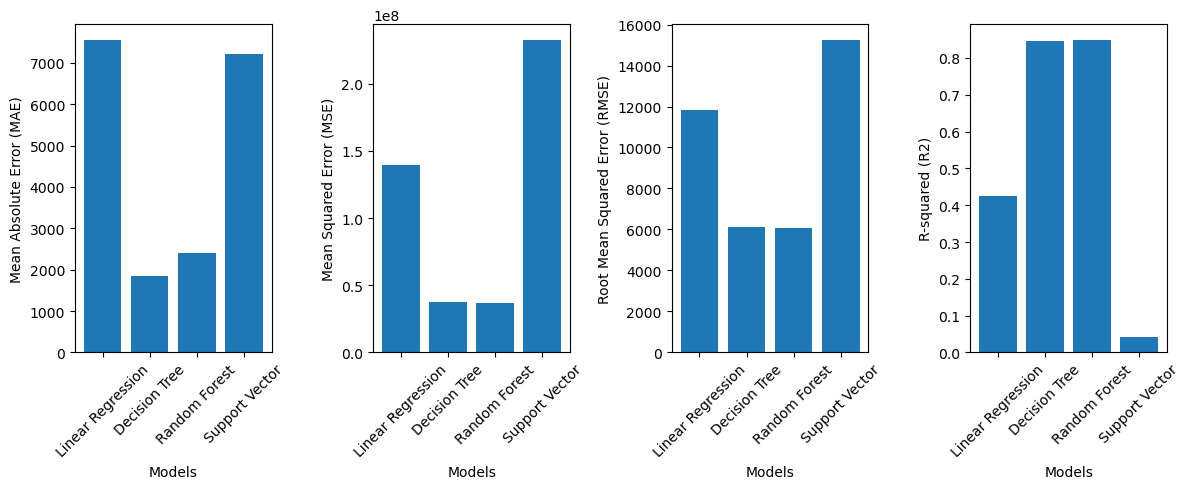

In [58]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector']

# Normalized and standardized results
mae_values = [7555.70, 1855.05, 2392.42, 7220.04]
mse_values = [139715937, 37353735, 36729560, 232675480]
rmse_values = [11820.15, 6111.77, 6060.49, 15253.70]
r2_values = [0.4256, 0.8464, 0.8490, 0.0434]

plt.figure(figsize=(12, 5))

# MAE bar plot
plt.subplot(1, 4, 1)
plt.bar(models, mae_values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)

# MSE bar plot
plt.subplot(1, 4, 2)
plt.bar(models, mse_values)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)

# RMSE bar plot
plt.subplot(1, 4, 3)
plt.bar(models, rmse_values)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)

# R-squared bar plot
plt.subplot(1, 4, 4)
plt.bar(models, r2_values)
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

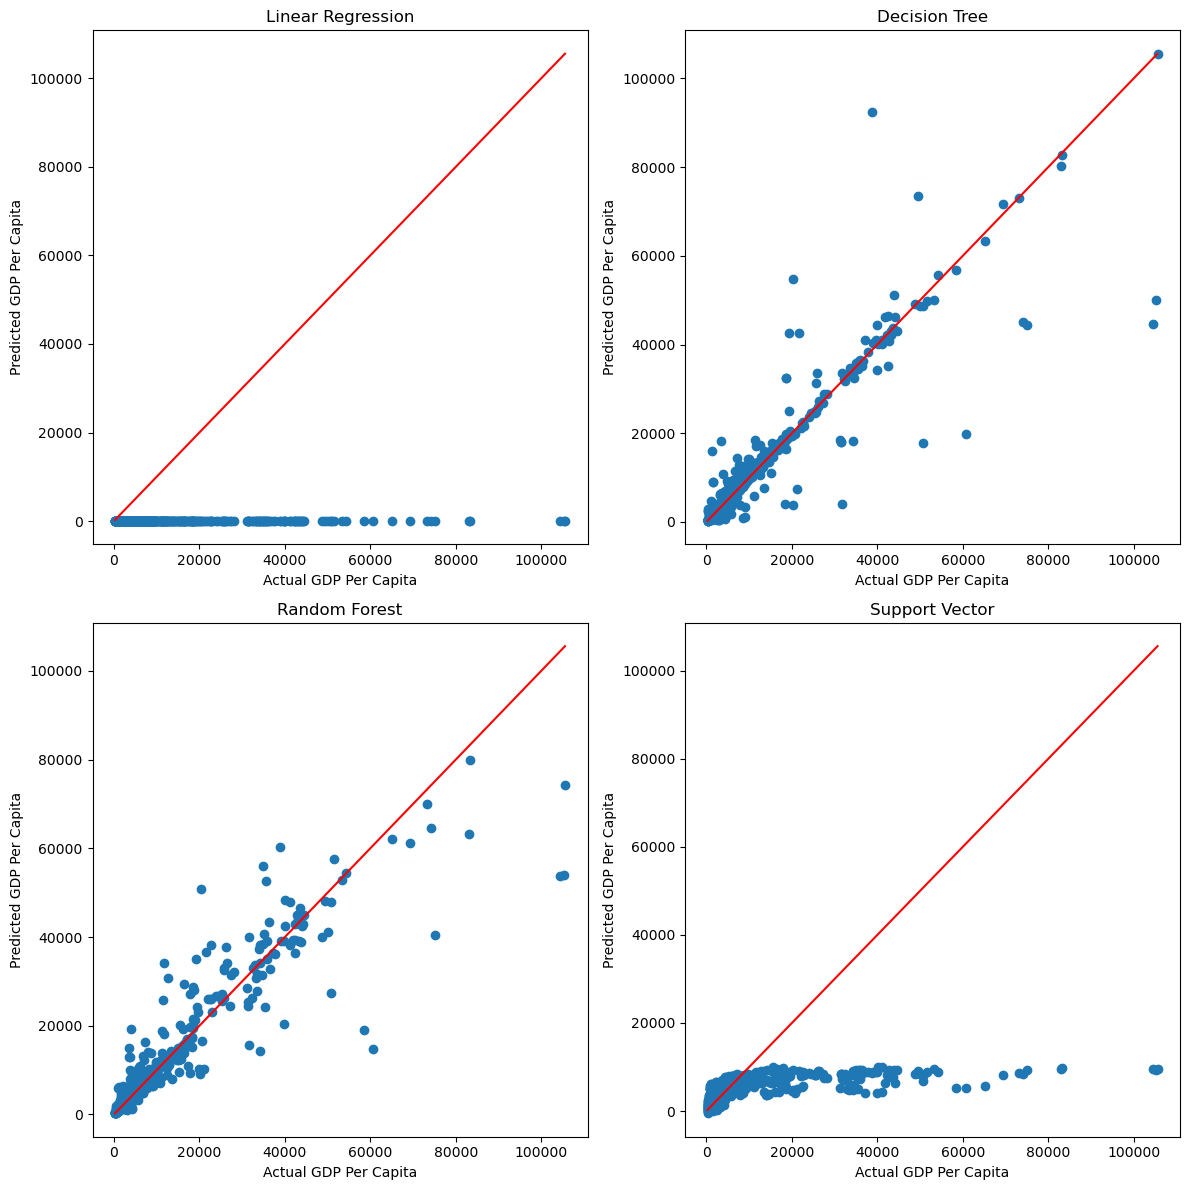

In [59]:
plt.figure(figsize=(12, 12))

# Linear Regression scatter plot
plt.subplot(2, 2, 1)
plt.scatter(y1_test, y_pred)
plt.xlabel('Actual GDP Per Capita')
plt.ylabel('Predicted GDP Per Capita')
plt.title('Linear Regression')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], 'r')

# Decision Tree scatter plot
plt.subplot(2, 2, 2)
plt.scatter(y1_test, y_pred_dt1)
plt.xlabel('Actual GDP Per Capita')
plt.ylabel('Predicted GDP Per Capita')
plt.title('Decision Tree')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], 'r')

# Random Forest scatter plot
plt.subplot(2, 2, 3)
plt.scatter(y1_test, y_pred_rf1)
plt.xlabel('Actual GDP Per Capita')
plt.ylabel('Predicted GDP Per Capita')
plt.title('Random Forest')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], 'r')

# Support Vector scatter plot
plt.subplot(2, 2, 4)
plt.scatter(y1_test, y_pred_svr1)
plt.xlabel('Actual GDP Per Capita')
plt.ylabel('Predicted GDP Per Capita')
plt.title('Support Vector')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], 'r')

plt.tight_layout()
plt.show()